# Exploracion De Datos De Accidentes

## Importes

In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

project_root = Path().resolve().parent
sys.path.append(str(project_root))

from lib.load_and_clean import load_and_clean

## Cargamos Los Datos

In [2]:
df = load_and_clean("../data/accidents.csv")

In [ ]:
print(df.columns)

Index(['id', 'severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'description', 'street', 'city', 'county',
       'state', 'zipcode', 'temperature(f)', 'wind_chill(f)', 'humidity(%)',
       'pressure(in)', 'visibility(mi)', 'wind_direction', 'wind_speed(mph)',
       'precipitation(in)', 'amenity', 'bump', 'crossing', 'give_way',
       'junction', 'no_exit', 'railway', 'roundabout', 'station', 'stop',
       'traffic_calming', 'traffic_signal', 'turning_loop', 'sunrise_sunset',
       'distancia_afectada_km', 'weather_simple'],
      dtype='object')
weather_simple
Fair       3405216
Cloudy     3366149
Rainy       577191
Other       203227
Snowy       173867
Windy         1956
Dusty          769
Extreme         19
Name: count, dtype: int64


## Representacion De Los Datos

### Histograma Mostrando Distribucion de Severidad De Accidentes

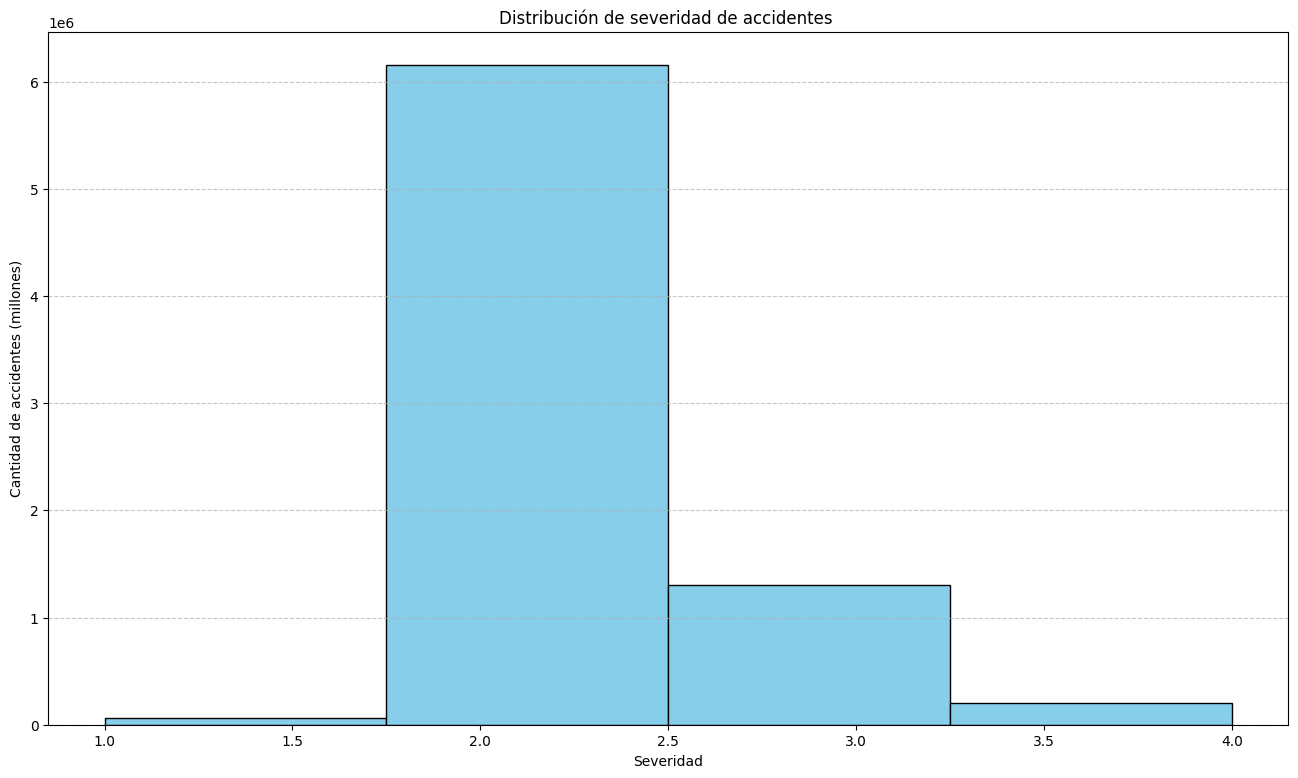

Severidad 1: 67366 accidentes (0.87%)
Severidad 2: 6156981 accidentes (79.67%)
Severidad 3: 1299337 accidentes (16.81%)
Severidad 4: 204710 accidentes (2.65%)


In [44]:
# Histograma
plt.figure(figsize=(16,9))

df['severity'].hist(bins=4, color='skyblue', edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', visible=False)
plt.title('Distribución de severidad de accidentes ')
plt.xlabel('Severidad')
plt.ylabel('Cantidad de accidentes (millones)')
plt.show()

# Porcentajes por severidad
total = len(df)
counts = df['severity'].value_counts().sort_index()
for sev, count in counts.items():
    pct = (count / total) * 100
    print(f"Severidad {sev}: {count} accidentes ({pct:.2f}%)")

### Grafica De Barras Mostrando Top 10 Cuidades Con Mas Accidentes

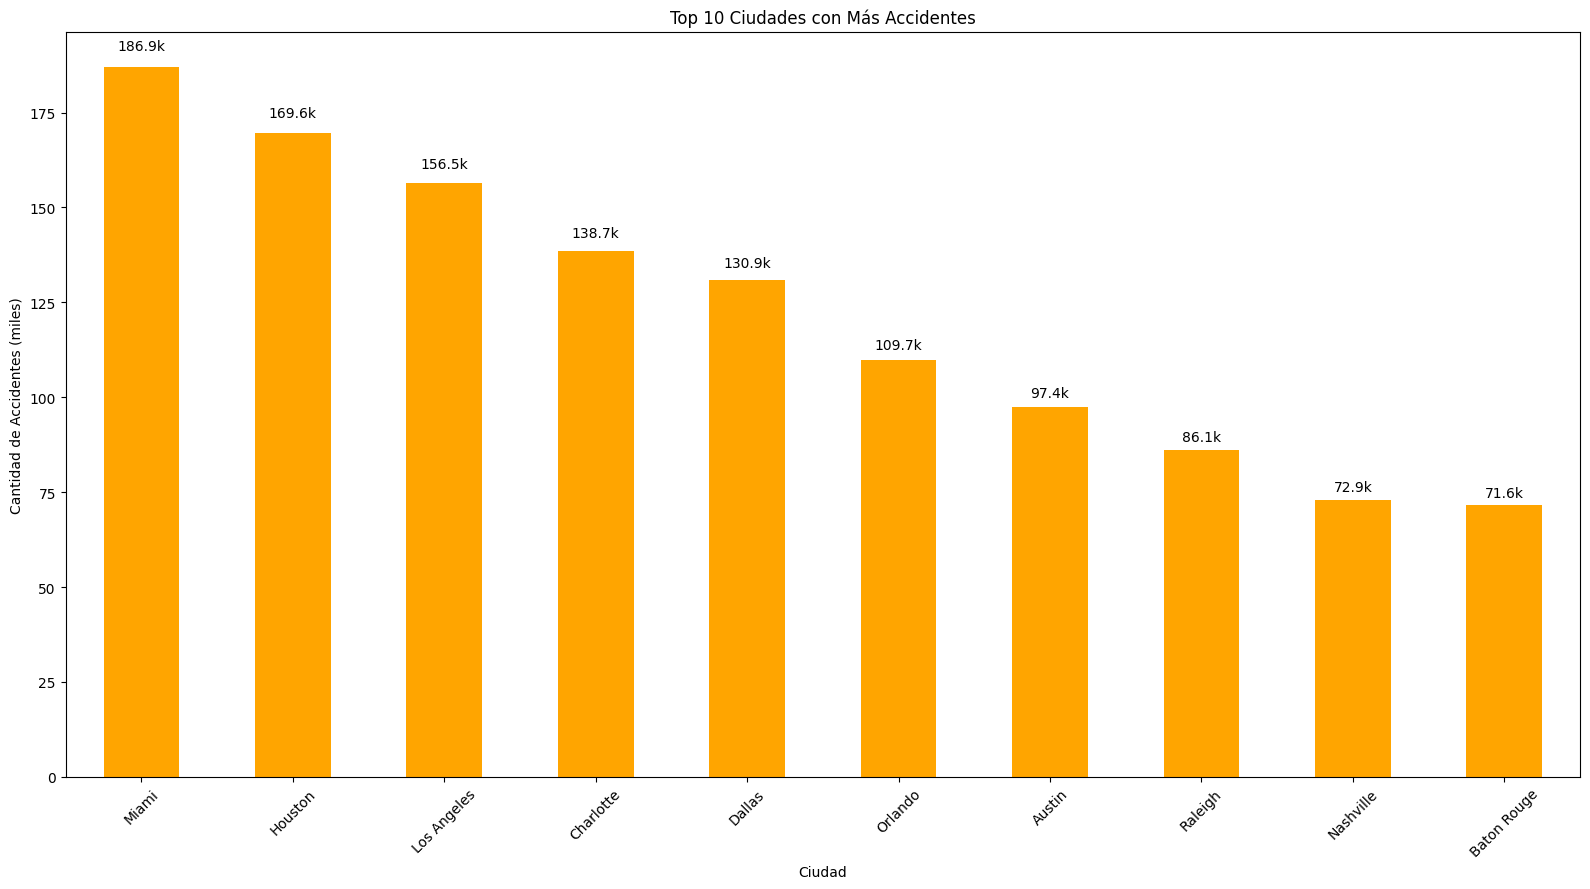

In [5]:
accidentes_por_ciudad = df['city'].value_counts().head(10)
accidentes_por_ciudad_k = accidentes_por_ciudad / 1000  # convertir a miles

plt.figure(figsize=(16,9))
accidentes_por_ciudad_k.plot(kind='bar', color='orange')

plt.title('Top 10 Ciudades con Más Accidentes')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Accidentes (miles)')
plt.xticks(rotation=45)

# Añadir etiquetas con un pequeño espacio sobre la barra
for i, v in enumerate(accidentes_por_ciudad_k):
    offset = v * 0.02  # 2% del valor de la barra
    plt.text(i, v + offset, f"{v:.1f}k", ha='center', va='bottom')

plt.tight_layout()
plt.show()

C:\Users\joseb_m\AppData\Local\Temp\ipykernel_17904\1898059480.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_time.resample('M')['severity'].count().plot(figsize=(12,5))


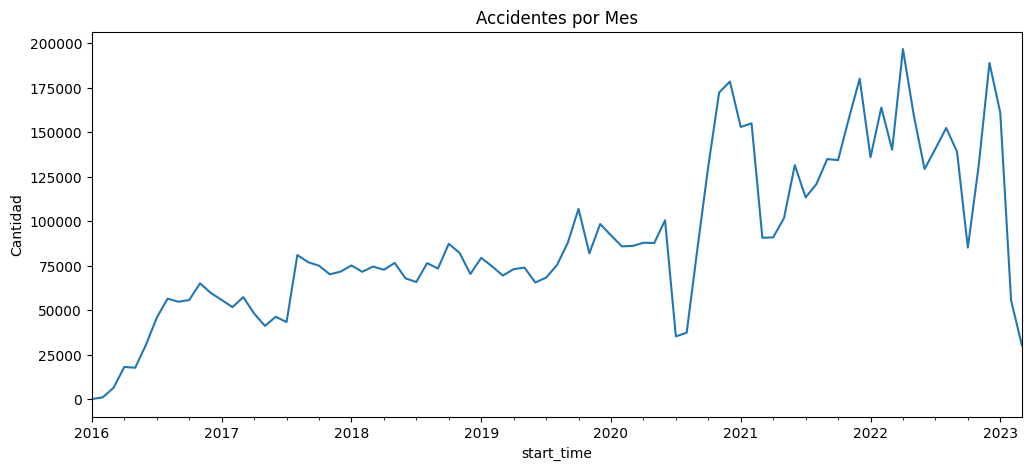

In [6]:
# Numero de accidentes por mes
df_time = df.set_index('start_time')
df_time.resample('M')['severity'].count().plot(figsize=(12,5))
plt.title('Accidentes por Mes')
plt.ylabel('Cantidad')
plt.show()

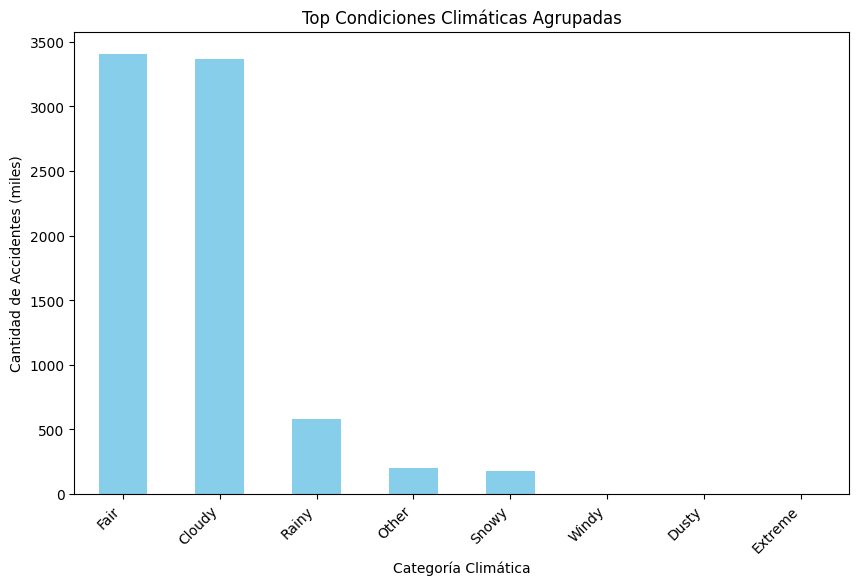

Fair: 3405216 accidentes (44.06%)
Cloudy: 3366149 accidentes (43.56%)
Rainy: 577191 accidentes (7.47%)
Other: 203227 accidentes (2.63%)
Snowy: 173867 accidentes (2.25%)
Windy: 1956 accidentes (0.03%)
Dusty: 769 accidentes (0.01%)
Extreme: 19 accidentes (0.00%)


In [45]:
top_weather_simple = df['weather_simple'].value_counts()

top_weather_simple_k = top_weather_simple / 1000

plt.figure(figsize=(10,6))
top_weather_simple_k.plot(kind='bar', color='skyblue')
plt.title('Top Condiciones Climáticas Agrupadas')
plt.xlabel('Categoría Climática')
plt.ylabel('Cantidad de Accidentes (miles)')
plt.xticks(rotation=45, ha='right')
plt.show()

top_weather_simple = df['weather_simple'].value_counts()

total = top_weather_simple.sum()

for cat, count in top_weather_simple.items():
    pct = (count / total) * 100
    print(f"{cat}: {count} accidentes ({pct:.2f}%)")

### Heatmap De Zonas Con Accidentes

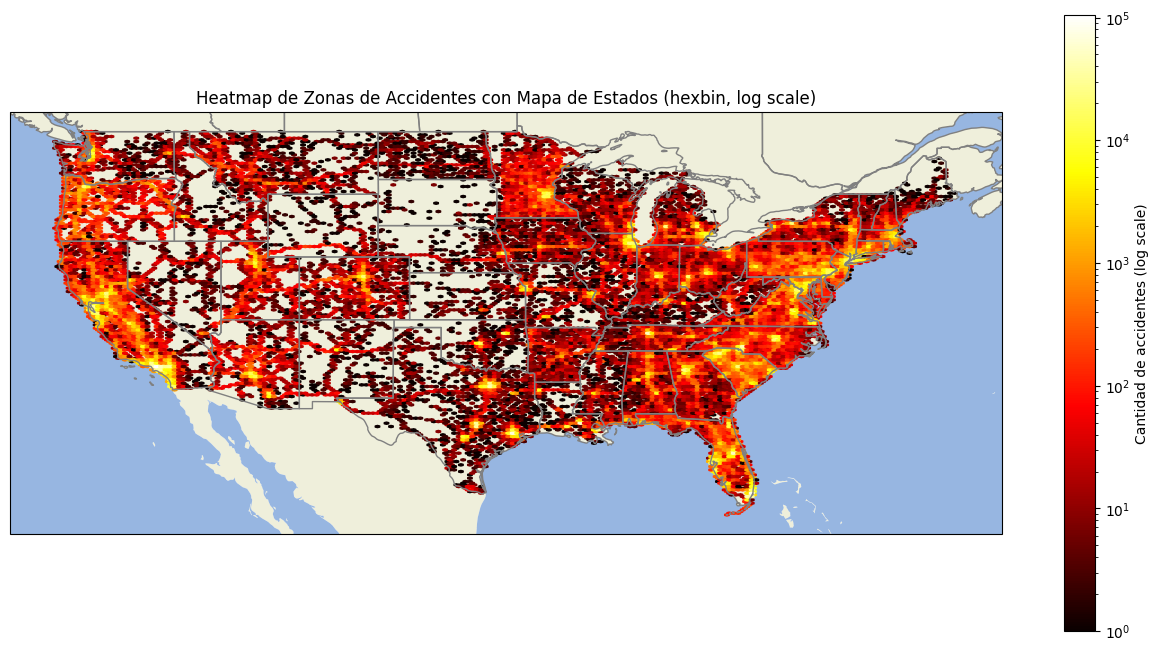

In [8]:
# Convert your lat/lng to the PlateCarree projection (standard for lon/lat)
plt.figure(figsize=(16,8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add US states
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

# Hexbin plot
hb = ax.hexbin(
    df['start_lng'], df['start_lat'],
    gridsize=200,
    cmap='hot',
    bins='log',
    mincnt=1,
    transform=ccrs.PlateCarree()  # Make sure data is interpreted correctly
)

# Colorbar
cb = plt.colorbar(hb, ax=ax, orientation='vertical', label='Cantidad de accidentes (log scale)')

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Heatmap de Zonas de Accidentes con Mapa de Estados (hexbin, log scale)")

plt.show()


## Mas Visualizaciones

#### Sample Para No Cargar Demasiado

In [9]:
df_sample = df.sample(frac=0.05, random_state=42)
df_sample.sample(3)

,id,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,description,street,...,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,distancia_afectada_km,weather_simple
1184478,A-1194255,2,2021-01-14 09:46:05,2021-01-14 11:05:49,30.202410,-92.031677,NaN,NaN,Accident on LA-3025 College Rd at Clem Dr.,S College Rd,...,False,False,False,False,False,False,False,Day,0.000000,Fair
3544768,A-3554651,2,2016-07-19 17:52:23,2016-07-19 23:52:23,33.778934,-117.831856,33.778696999999994,-117.832063,Ramp to CA-22/Garden Grove Fwy - Accident.,E Fairway Dr,...,False,False,False,False,False,False,False,Day,0.032187,Fair
1831076,A-1840939,2,2019-11-23 17:43:19,2019-11-23 18:12:52,37.496212,-122.232376,NaN,NaN,#3 lane blocked due to accident on US-101 Nort...,Bayshore Fwy N,...,False,False,False,False,False,False,False,Night,0.000000,Fair


### Barras Severidad de accidentes por Precipitacion

C:\Users\joseb_m\AppData\Local\Temp\ipykernel_17904\3685430656.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df_sample.groupby(['precip_bin', 'severity']).size().unstack(fill_value=0)


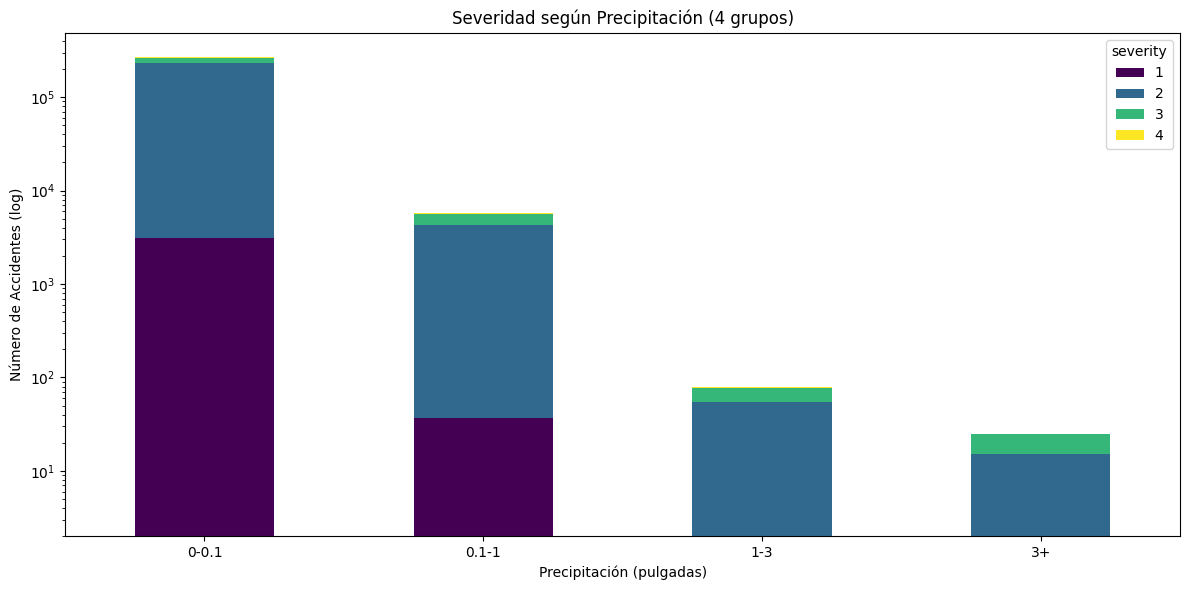

In [48]:
# Bins de 4 grupos
bins = [0, 0.1, 1, 3, df_sample['precipitation(in)'].max()]
labels = ['0-0.1', '0.1-1', '1-3', '3+']

df_sample['precip_bin'] = pd.cut(
    df_sample['precipitation(in)'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Conteo real de accidentes por bin y severidad
counts = df_sample.groupby(['precip_bin', 'severity']).size().unstack(fill_value=0)

# Gráfico apilado proporcional en escala log para que se vea todo
ax = counts.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap='viridis'
)

ax.set_yscale('log')
ax.set_ylabel('Número de Accidentes (log)')
plt.xlabel('Precipitación (pulgadas)')
plt.title('Severidad según Precipitación (4 grupos)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Diagrama de Barras + Linea Mostrando Horas Vs Cantidad De Accidentes

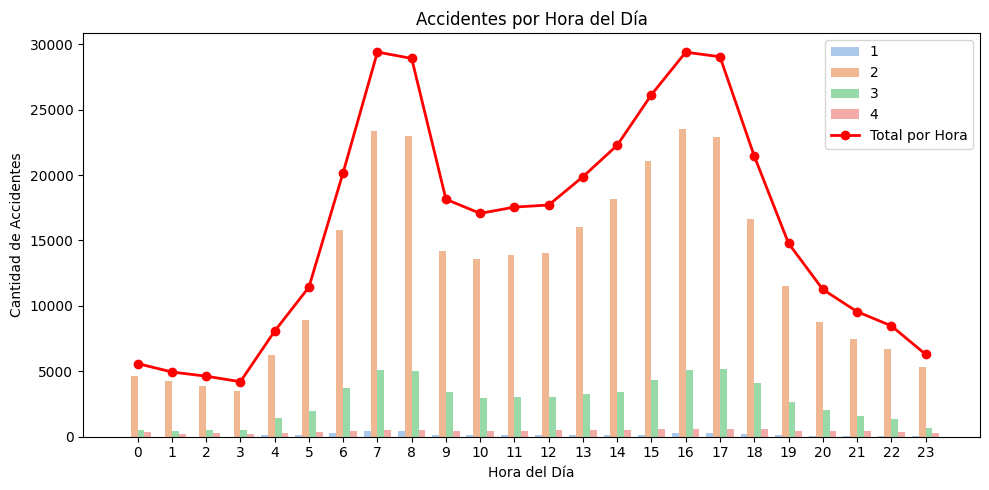

In [ ]:
# Extraer la hora
df_sample['hour'] = df_sample['start_time'].dt.hour

# Contar accidentes por hora
conteo_por_hora = df_sample.groupby('hour').size()

plt.figure(figsize=(10,5))

# Gráfico de barras por hora y severidad
sns.countplot(data=df_sample, x='hour', hue='severity', palette='pastel')

# Línea superpuesta mostrando total de accidentes por hora
plt.plot(conteo_por_hora.index, conteo_por_hora.values, color='red', marker='o', linewidth=2, label='Total por Hora')

plt.title('Accidentes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Accidentes')
plt.legend()
plt.tight_layout()
plt.show()


### Barras Mostrando Zonas De Interest Vs Accidentes

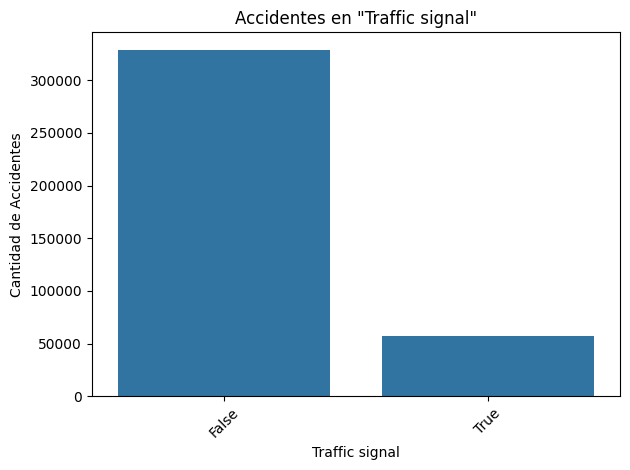

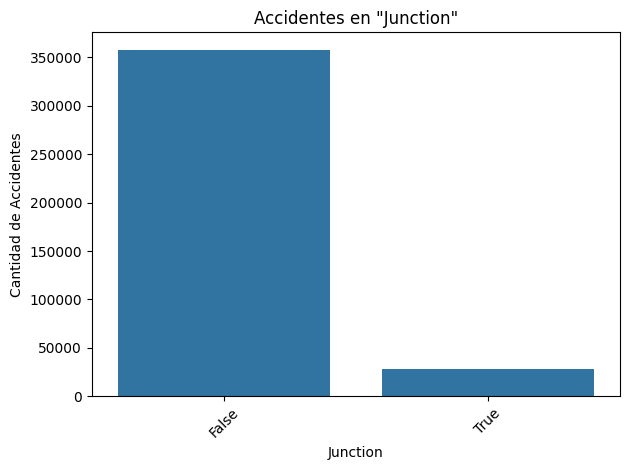

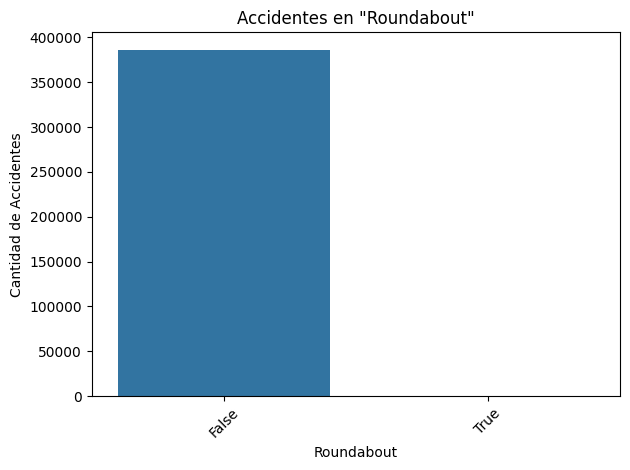

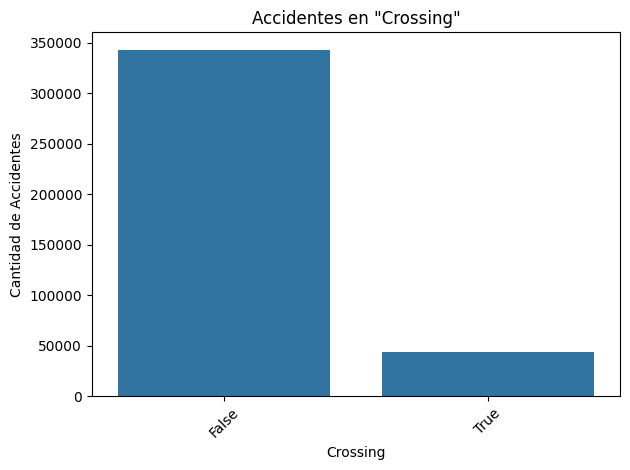

In [ ]:
features = ['traffic_signal', 'junction', 'roundabout', 'crossing']

for f in features:
    sns.countplot(data=df_sample, x=f)
    plt.title(f'Accidentes en "{f.replace("_", " ").capitalize()}"')
    plt.xlabel(f.replace("_", " ").capitalize())
    plt.ylabel('Cantidad de Accidentes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Histograma Viendo Comparacion Entre Accidentes De Dia vs Noche

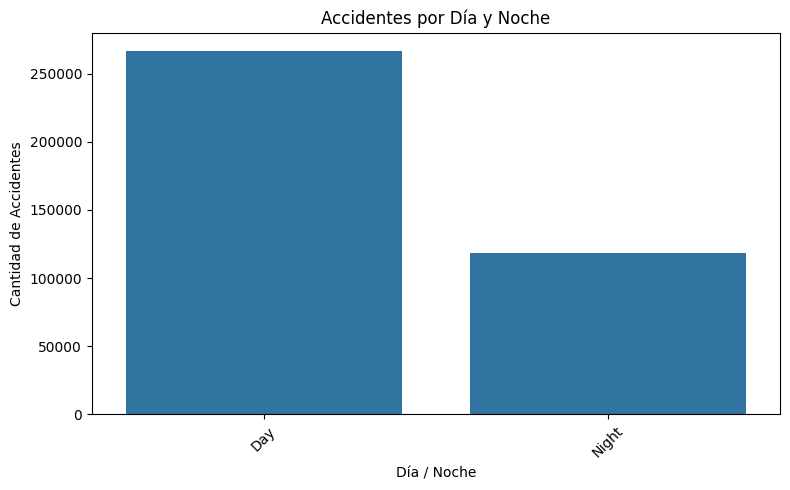

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df_sample,
    x='sunrise_sunset',
)
plt.xlabel('Día / Noche')
plt.ylabel('Cantidad de Accidentes')
plt.title('Accidentes por Día y Noche')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Severidad De Accidentes de Dia Vs. De Noche

C:\Users\joseb_m\AppData\Local\Temp\ipykernel_27440\2221829605.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dia_noche = df_sample.groupby(['sunrise_sunset', 'severity']).size().reset_index(name='cantidad')
C:\Users\joseb_m\AppData\Local\Temp\ipykernel_27440\2221829605.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dia_noche['porcentaje'] = dia_noche.groupby('sunrise_sunset')['cantidad'].transform(lambda x: x / x.sum() * 100)


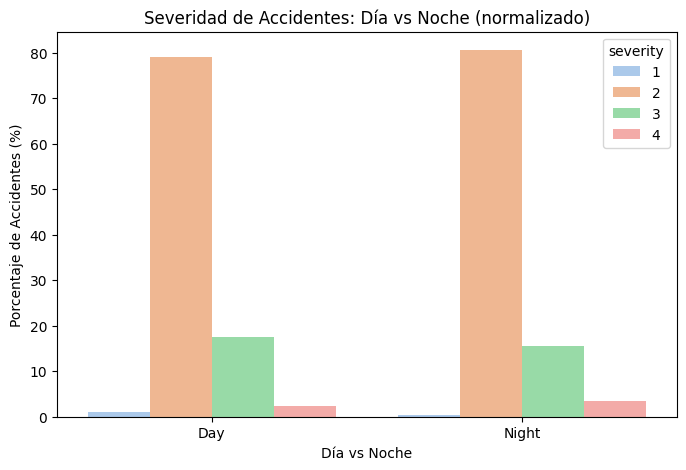

In [ ]:
dia_noche = df_sample.groupby(['sunrise_sunset', 'severity']).size().reset_index(name='cantidad')
dia_noche['porcentaje'] = dia_noche.groupby('sunrise_sunset')['cantidad'].transform(lambda x: x / x.sum() * 100)

plt.figure(figsize=(8,5))
sns.barplot(
    data=dia_noche,
    x='sunrise_sunset',
    y='porcentaje',
    hue='severity',
    palette='pastel'
)
plt.ylabel('Porcentaje de Accidentes (%)')
plt.xlabel('Día vs Noche')
plt.title('Severidad de Accidentes: Día vs Noche (normalizado)')
plt.show()

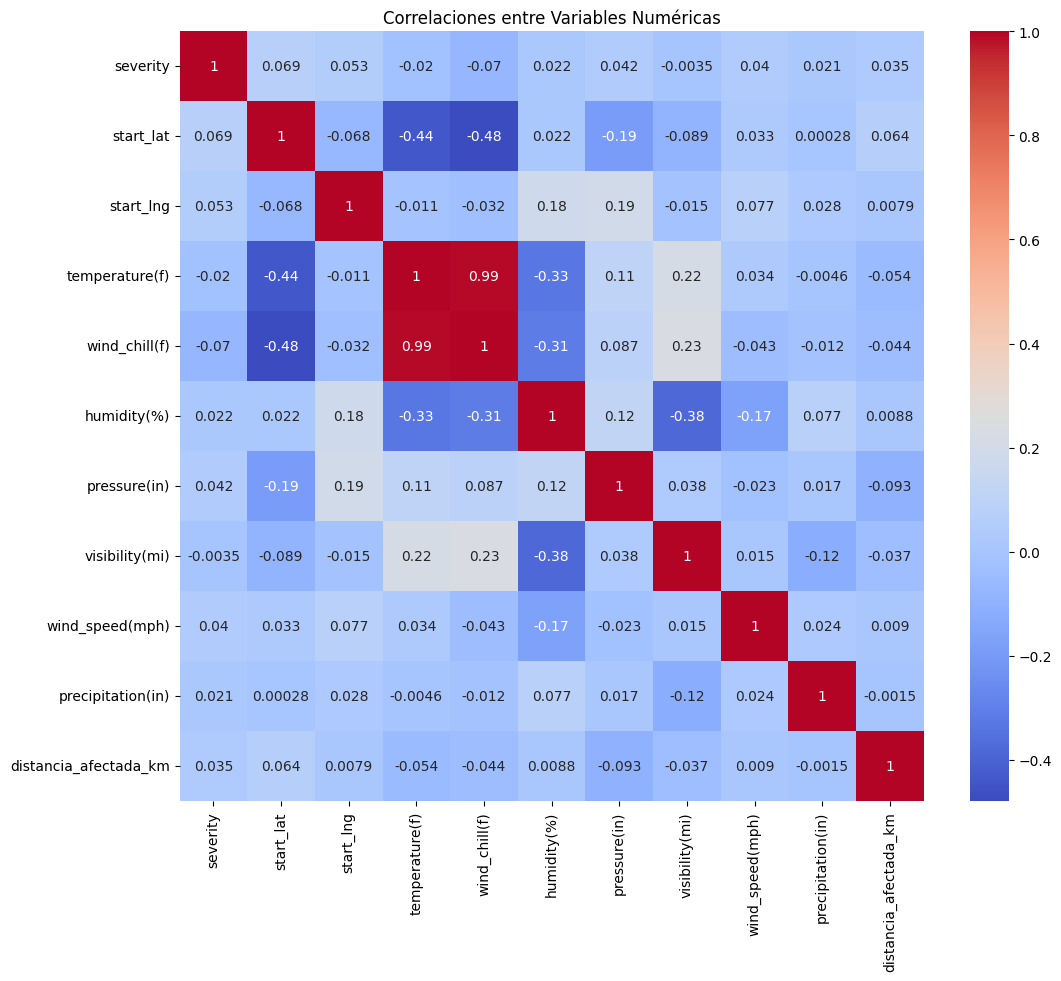

In [ ]:
# Convertir sunrise_sunset a numérica
df['sunrise_sunset_num'] = df['sunrise_sunset'].map({'Day': 1, 'Night': 0})

# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include='number')

# Matriz de correlación solo con columnas numéricas
plt.figure(figsize=(12,10))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlaciones entre Variables Numéricas')
plt.show()